## ปริยวิศว์ เตชะกฤตเมธีธำรง 6510450593

In [91]:
import seaborn as sns
import pandas as pd

## 1

In [92]:
df = pd.read_csv('players.csv')
df = df.iloc[:, :8] # ตัด column NaN

# หารด้วยนาทีที่เล่น เพื่อความเท่าเทียม
df['shots'] = df['shots'] / df['minutes']
df['passes'] = df['passes'] / df['minutes']
df['tackles'] = df['tackles'] / df['minutes']
df['saves'] = df['saves'] / df['minutes']

# เรียงลำดับ position
position_order = ['goalkeeper', 'defender', 'midfielder', 'forward']
df['position'] = pd.Categorical(df['position'], categories=position_order, ordered=True)
df.head()

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0.000000,0.375000,0.000000,0.000000
1,Belhadj,Algeria,defender,270,0.003704,0.540741,0.029630,0.000000
2,Boudebouz,Algeria,midfielder,74,0.040541,0.378378,0.013514,0.000000
3,Bougherra,Algeria,defender,270,0.003704,0.329630,0.040741,0.000000
4,Chaouchi,Algeria,goalkeeper,90,0.000000,0.188889,0.000000,0.022222


## 2

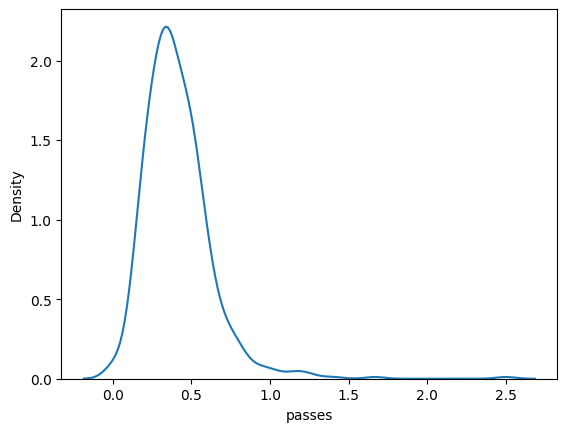

In [93]:
sns.kdeplot(data=df, x='passes');

## 3

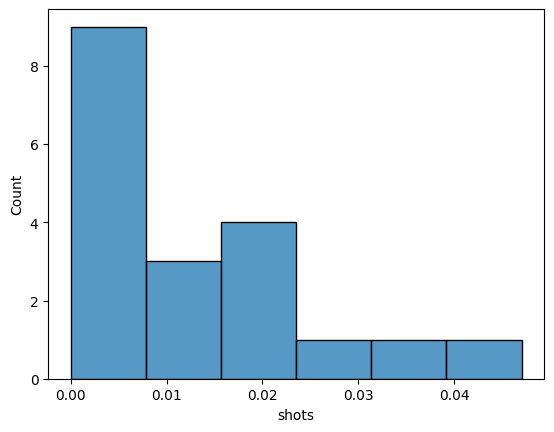

In [94]:
usa = df.query('team == "USA"')
sns.histplot(data=usa, x='shots');

## 4

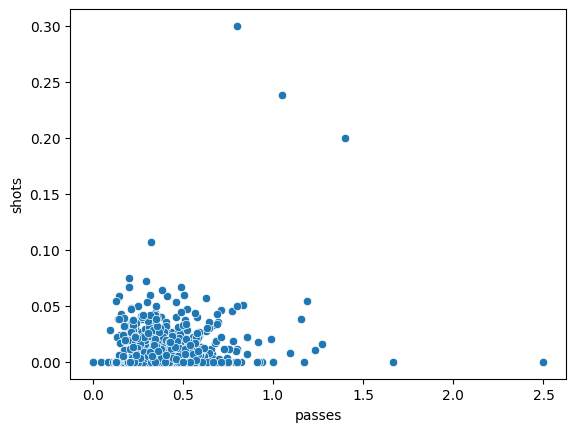

In [95]:
sns.scatterplot(data=df, x='passes', y='shots');

## 5

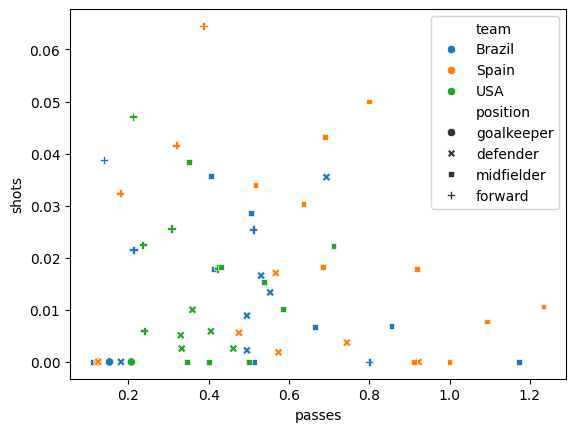

In [96]:
team = df.query('team.isin(["Brazil", "USA", "Spain"])')
sns.scatterplot(data=team, x='passes', y='shots', hue='team', style='position');

## 6

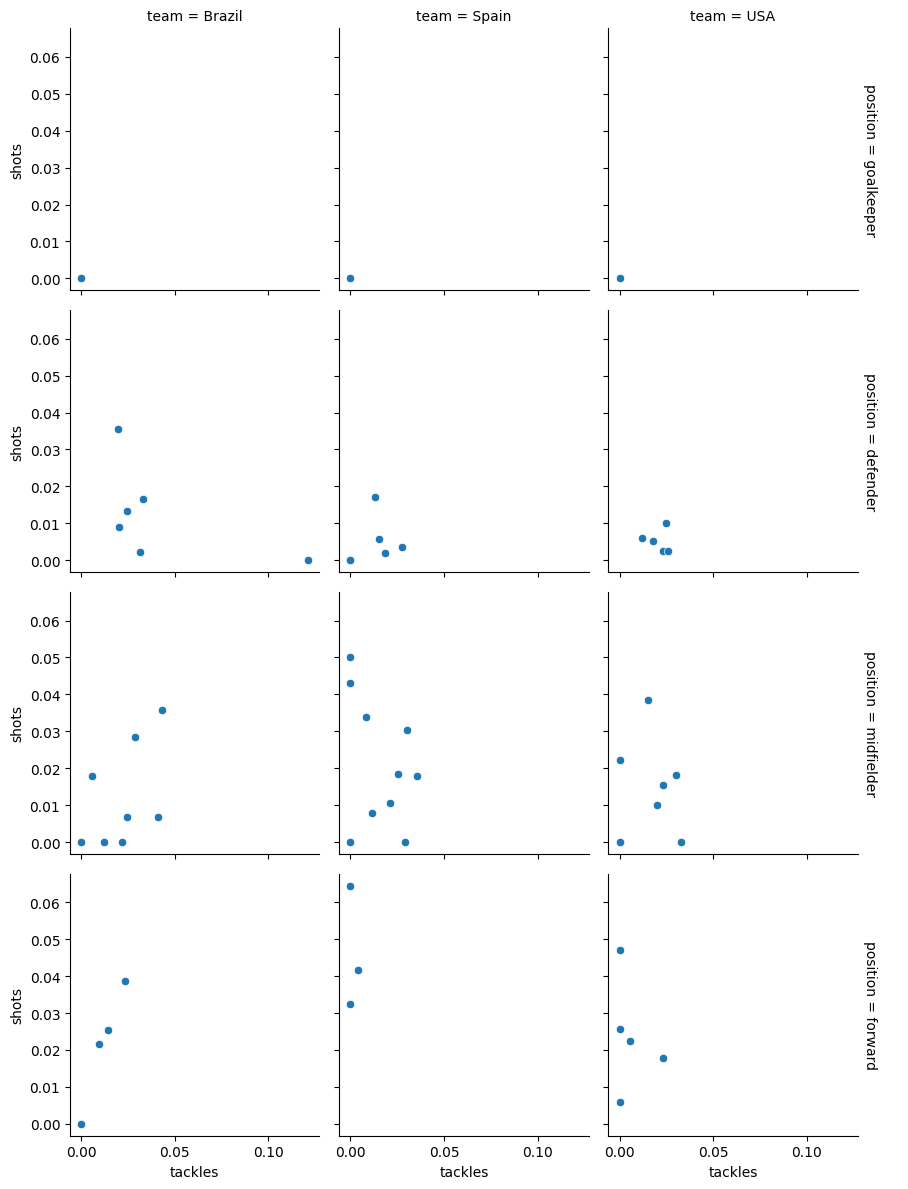

In [97]:
grid = sns.FacetGrid(data=team, col='team', row='position', margin_titles=True, height=3)
grid.map(sns.scatterplot, 'tackles', 'shots')
grid.add_legend()

## 7

<Axes: xlabel='team', ylabel='passes'>

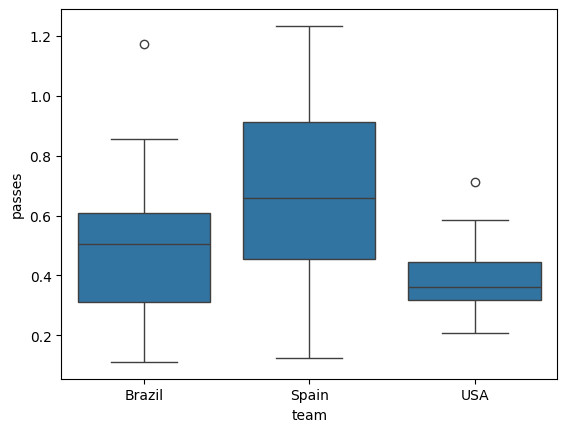

In [98]:
sns.boxplot(data=team, y='passes', x='team')

## 8

<Axes: xlabel='team', ylabel='passes'>

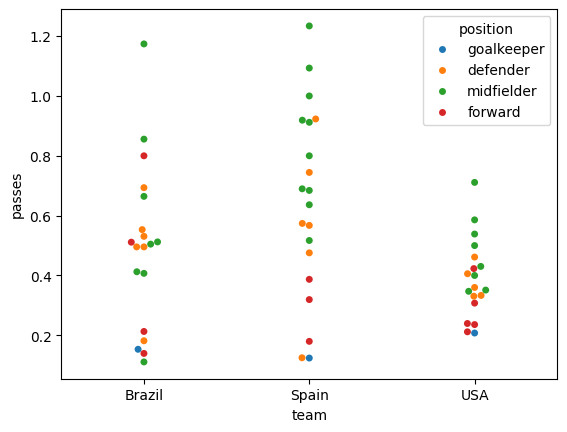

In [99]:
sns.swarmplot(data=team, x='team', y='passes', hue='position')

## 9

<Axes: xlabel='position', ylabel='tackles'>

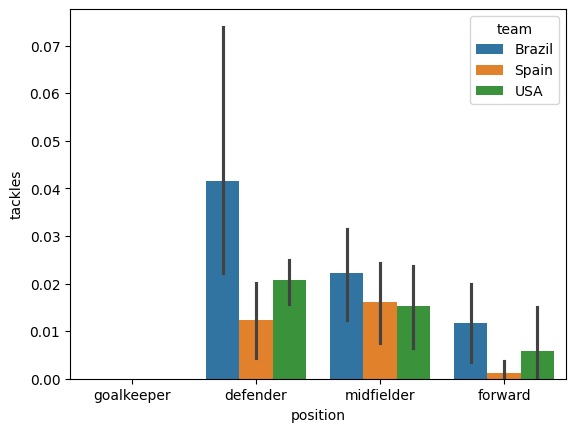

In [100]:
sns.barplot(data=team, x='position', y='tackles', hue='team')

## 10

<Axes: xlabel='passes', ylabel='shots'>

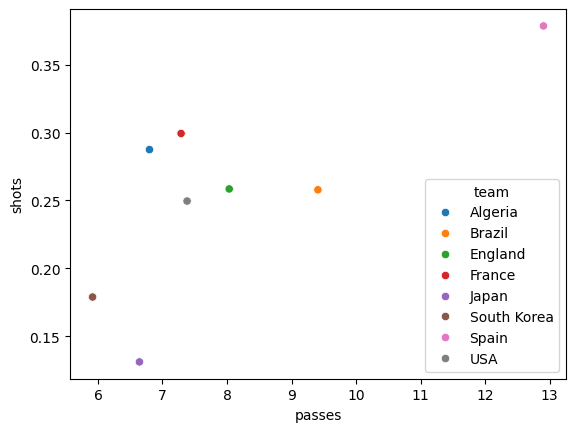

In [101]:
team8 = df.query("team.isin(['Brazil','Japan','USA','Spain','Algeria','France','England','South Korea'])")
team8_sums = team8.groupby('team').agg({'passes': 'sum', 'shots': 'sum'})
sns.scatterplot(data=team8_sums, x='passes', y='shots', hue='team')

## 11

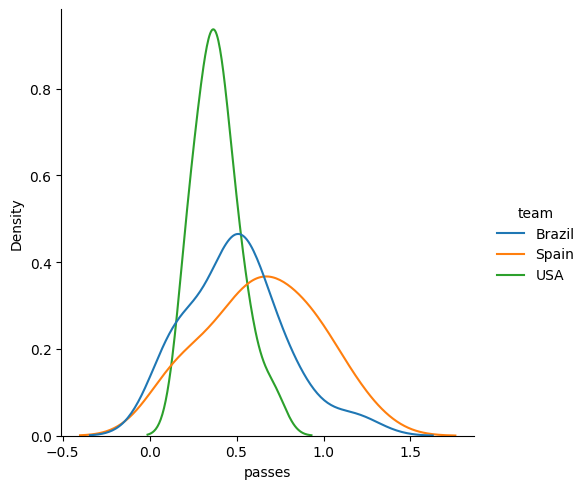

In [102]:
sns.displot(data=team, x='passes', kind='kde', hue='team')